# Importing packages and dataset 

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('fraud_prediction.csv')

# Prepping model

In [12]:
features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [13]:
ridge_regression = Ridge()

# Searching for optimized Alpha

In [14]:
grid = GridSearchCV(ridge_regression, {'alpha':[0.0001,0.001,0.01,0.1,10]})
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print("The most optimal value of alpha is:", grid.best_params_)

The most optimal value of alpha is: {'alpha': 0.01}


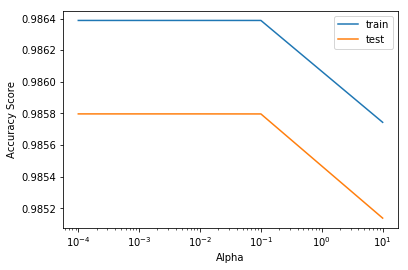

In [16]:
train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Ridge object and fit
    ridge_regression = Ridge(alpha= value)
    ridge_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()

# Fitting and Running Model

In [17]:
ridge_regression= Ridge(alpha = 0.01)

In [18]:
ridge_regression.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
print( "{0:.4}".format(ridge_regression.score(X_test, y_test)))

0.9858


In [22]:
pipeline_order = [('scaler', StandardScaler()),('linear_regression',Ridge())]
pipeline = Pipeline(pipeline_order)

linear_reg_scaled = pipeline.fit(X_train,y_train)

print( "{0:.4}".format(linear_reg_scaled.score(X_test,y_test)))

#In this particular case scaling the data did not provide improment in the model performance, but
#it is important to do this as it does lead to improvements in accuracy score in most cases

0.9858
